# 1. Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/Naveen P Aradhyamath/Downloads/Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 Look's like we don't have any NaN values, so most likely we won't have to deal with data cleaning

In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

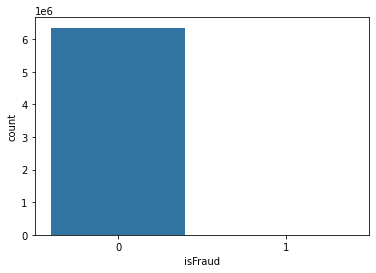

In [113]:
sns.countplot(df['isFraud'])

- As it can be seen from the plot, the data is highly imbalanced

In [10]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
df['Merchants'] = df['nameDest'].str[0]

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Merchants
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,M


In [14]:
df[df['Merchants'] == 'M']['isFraud'].value_counts()

0    2151495
Name: isFraud, dtype: int64

there is no information for customers that start with M (Merchants), hence removing the rows

In [15]:
df1 = df[df['Merchants'] == 'C']

In [16]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Merchants
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,C
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0,C
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0,C
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0,C


In [17]:
df1.drop('Merchants', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df1['type'] = le.fit_transform(df1['type'])

In [18]:
df1.shape

(4211125, 11)

In [19]:
df1.isFraud.value_counts()

0    4202912
1       8213
Name: isFraud, dtype: int64

In [73]:
normal_transactions = len(df1[df1["isFraud"] == 0])
fraud_transactions = len(df1[df1["isFraud"] == 1])
total_transactions = normal_transactions + fraud_transactions

In [75]:
p_normal_transactions = (normal_transactions / total_transactions) * 100
p_fraud_transactions = (fraud_transactions / total_transactions) * 100

In [114]:
print(p_normal_transactions)
print(p_fraud_transactions)

99.80496898097302
0.1950310190269821


- The 99% are Legit transactions and 0.19% are fraud transactions
- We going to apply undersampling to deal with this class imlabalance issue. 
- Let's also plot the fraud and legit transaction with amounts to check if there is a relationship

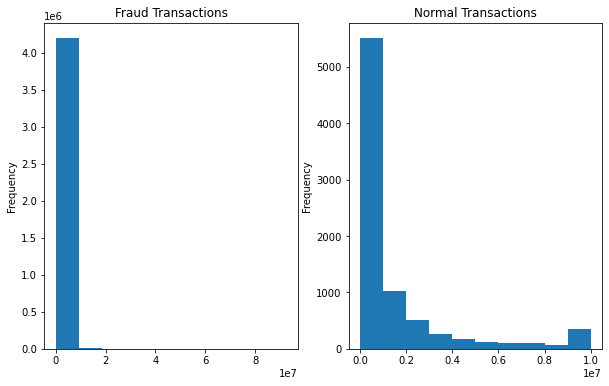

In [76]:
normal_trcs = df1[df1['isFraud'] == 0]
fraud_trcs = df1[df1['isFraud'] == 1]
plt.figure(figsize=(10,6))
plt.subplot(121)
normal_trcs.amount.plot.hist(title="Fraud Transactions")
plt.subplot(122)
fraud_trcs.amount.plot.hist(title="Normal Transactions")
plt.show()

there is no pattern when we compare amount with isFraud
- We can also check the pattern between step, amount 

# 2. Undersampling

In [85]:
from imblearn.under_sampling import RandomUnderSampler

In [86]:
rus = RandomUnderSampler() # Create an undersampler object

In [ ]:
# Drop the time and amount features
new_data = df1.drop(['step', 'amount'], axis=1)
X = new_data.values
y = df1.isFraud.values

In [ ]:
X_resampled, y_resampled = rus.fit_sample(X, y) # Resample the features for training data and the target


In [88]:
# Revert resampeled data into a dataframe
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)
y_resampled.columns = ['isFraud']
undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [100]:
undersampled_data.columns = ['type','nameOrig','oldbalanceOrg', 'newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','F','isFlaggedFraud','isFraud']

In [101]:
undersampled_data.head()

,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,F,isFlaggedFraud,isFraud
0,1,C628399328,0,0,C401389693,757041,901220,0,0,0
1,0,C1404199489,8.19403e+06,8.1999e+06,C316846654,1.22726e+06,1.22139e+06,0,0,0
2,1,C717616350,198458,114685,C1017913693,6.23923e+06,6.323e+06,0,0,0
3,3,C1865629126,0,0,C219416103,2.22578e+06,2.88355e+06,0,0,0
4,1,C289400337,205778,57929.3,C1560565000,1.34189e+06,1.91639e+06,0,0,0


In [102]:
undersampled_data.drop(undersampled_data.columns[7], axis=1, inplace=True) 


In [103]:
X = undersampled_data.drop(['isFraud','nameOrig', 'nameDest'], axis=1)

In [104]:
X.head()

,type,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0,0,757041,901220,0
1,0,8.19403e+06,8.1999e+06,1.22726e+06,1.22139e+06,0
2,1,198458,114685,6.23923e+06,6.323e+06,0
3,3,0,0,2.22578e+06,2.88355e+06,0
4,1,205778,57929.3,1.34189e+06,1.91639e+06,0


In [105]:
y = undersampled_data['isFraud']

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2) # Split the resampeled data into training and test sets

# 3. Prediction
- We are going to train a logistic regression model
- The accuracy metric will be Recall since the normal transaction count is very high and some fraud cases can be predicted as legit. We wouldn't want that.

In [107]:
lr_model = LogisticRegression() 
lr_model.fit(X_train, y_train)

LogisticRegression()

In [108]:
predictions = lr_model.predict(X_test)

In [110]:
cnf_matrix= metrics.confusion_matrix(y_test,predictions) # Let's see the confusion matrix and evaluate the model 

In [111]:
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))

the recall for this model is : 0.962287104622871


TP 1582
TN 1505
FP 137
FN 62


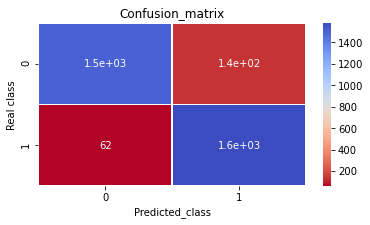


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1642
           1       0.92      0.96      0.94      1644

    accuracy                           0.94      3286
   macro avg       0.94      0.94      0.94      3286
weighted avg       0.94      0.94      0.94      3286



In [112]:
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\n----------Classification Report------------------------------------")
print(metrics.classification_report(y_test,predictions))